In [1]:
from PIL import Image
import numpy as np
import random
import itertools
import scipy.misc
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
%matplotlib inline

In [11]:
#testing subtract

#two matrix subtract
x=tf.constant([[1,2],[2,1]])  
y=tf.constant([[1,1],[1,2]])
z=tf.subtract(x,y)
#matrix subtract a constant
x1=tf.constant([[1,2],[2,1]])  
y1=tf.constant(2)
z1=tf.subtract(x1,y1)
#a constant subtract a matrix
x2=tf.constant(2)
y2=tf.constant([[1,2],[2,1]])
z2=tf.subtract(x2,y2)

with tf.Session() as sess:
    z_v,z1_v,z2_v=sess.run([z,z1,z2])
    print('z = \n%s'%(z_v))
    print('z1 = \n%s'%(z1_v))
    print('z2 = \n%s'%(z2_v))
    
#testing argmax

A = [[1,3,4,5,6]]
B = [[1,3,4], [2,4,1]]
 
with tf.Session() as sess:
    print('\n')
    print(sess.run(tf.argmax(A, 1)))
    print(sess.run(tf.argmax(B, 1)))

z = 
[[ 0  1]
 [ 1 -1]]
z1 = 
[[-1  0]
 [ 0 -1]]
z2 = 
[[1 0]
 [0 1]]


[4]
[2 1]


W0827 16:08:13.155298 140125394077504 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0827 16:08:13.350167 140125394077504 deprecation.py:323] From /home/se7ven/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


episode 25 , average reward of last 25 episode 2.16
episode 50 , average reward of last 25 episode 3.0
episode 75 , average reward of last 25 episode 1.8
episode 100 , average reward of last 25 episode 1.36
episode 125 , average reward of last 25 episode 1.96
episode 150 , average reward of last 25 episode 2.0
episode 175 , average reward of last 25 episode 1.8
episode 200 , average reward of last 25 episode 1.96
episode 225 , average reward of last 25 episode 1.8
episode 250 , average reward of last 25 episode 3.32
episode 275 , average reward of last 25 episode 5.12
episode 300 , average reward of last 25 episode 5.68
episode 325 , average reward of last 25 episode 8.56
episode 350 , average reward of last 25 episode 9.64
episode 375 , average reward of last 25 episode 11.6
episode 400 , average reward of last 25 episode 15.04
episode 425 , average reward of last 25 episode 15.44
episode 450 , average reward of last 25 episode 18.52
episode 475 , average reward of last 25 episode 21.

episode 3800 , average reward of last 25 episode 21.56
episode 3825 , average reward of last 25 episode 21.08
episode 3850 , average reward of last 25 episode 20.92
episode 3875 , average reward of last 25 episode 21.56
episode 3900 , average reward of last 25 episode 21.76
episode 3925 , average reward of last 25 episode 21.28
episode 3950 , average reward of last 25 episode 20.72
episode 3975 , average reward of last 25 episode 21.4
episode 4000 , average reward of last 25 episode 21.52
Saved Model
episode 4025 , average reward of last 25 episode 22.32
episode 4050 , average reward of last 25 episode 19.36
episode 4075 , average reward of last 25 episode 21.6
episode 4100 , average reward of last 25 episode 23.0
episode 4125 , average reward of last 25 episode 20.28
episode 4150 , average reward of last 25 episode 20.4
episode 4175 , average reward of last 25 episode 22.96
episode 4200 , average reward of last 25 episode 22.68
episode 4225 , average reward of last 25 episode 22.08
ep

W0827 16:41:29.896525 140125394077504 deprecation.py:323] From /home/se7ven/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


episode 6000 , average reward of last 25 episode 22.88
Saved Model
episode 6025 , average reward of last 25 episode 22.72
episode 6050 , average reward of last 25 episode 22.28
episode 6075 , average reward of last 25 episode 21.92
episode 6100 , average reward of last 25 episode 20.44
episode 6125 , average reward of last 25 episode 21.84
episode 6150 , average reward of last 25 episode 22.0
episode 6175 , average reward of last 25 episode 22.28
episode 6200 , average reward of last 25 episode 20.6
episode 6225 , average reward of last 25 episode 22.92
episode 6250 , average reward of last 25 episode 22.4
episode 6275 , average reward of last 25 episode 19.88
episode 6300 , average reward of last 25 episode 22.28
episode 6325 , average reward of last 25 episode 23.08
episode 6350 , average reward of last 25 episode 22.4
episode 6375 , average reward of last 25 episode 20.96
episode 6400 , average reward of last 25 episode 22.64
episode 6425 , average reward of last 25 episode 21.52
ep

KeyboardInterrupt: 

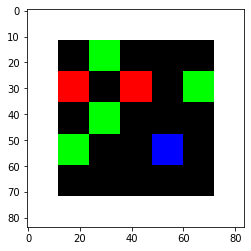

In [2]:
##GridWorld environment set up

#create game objects
class gameOb():
    def __init__(self,coordinates,size,intensity,channel,reward,name):
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.size = size
        self.intensity = intensity
        self.channel = channel
        self.reward = reward
        self.name = name
        
#init game environment       
class gameEnv():
    def __init__(self,size):
        self.sizeX = size
        self.sizeY = size
        self.actions = 4
        self.objects = []
        a = self.reset()
        plt.imshow(a,interpolation="nearest")
        
#define game objects
    def reset(self):
        self.objects = []
        hero = gameOb(self.newPosition(),1,1,2,None,'hero')
        self.objects.append(hero)
        goal = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(goal)
        hole = gameOb(self.newPosition(),1,1,0,-1,'fire')
        self.objects.append(hole)
        goal2 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(goal2)
        hole2 = gameOb(self.newPosition(),1,1,0,-1,'fire')
        self.objects.append(hole2)
        goal3 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(goal3)
        goal4 = gameOb(self.newPosition(),1,1,1,1,'goal')
        self.objects.append(goal4)
        state = self.renderEnv()
        self.state = state
        return state
    
#define moving rules    
    def moveChar(self,direction):
        # 0 - up, 1 - down, 2 - left, 3 - right
        hero = self.objects[0]
        heroX = hero.x
        heroY = hero.y
        if direction == 0 and hero.y >= 1:
            hero.y -= 1
        if direction == 1 and hero.y <= self.sizeY-2:
            hero.y += 1
        if direction == 2 and hero.x >= 1:
            hero.x -= 1
        if direction == 3 and hero.x <= self.sizeX-2:
            hero.x += 1     
        self.objects[0] = hero
        
#define position    
    def newPosition(self):
        iterables = [ range(self.sizeX), range(self.sizeY)]
        points = []
        for t in itertools.product(*iterables):
            points.append(t)
        currentPositions = []
        for objectA in self.objects:
            if (objectA.x,objectA.y) not in currentPositions:
                currentPositions.append((objectA.x,objectA.y))
        for pos in currentPositions:
            points.remove(pos)
        location = np.random.choice(range(len(points)),replace=False)
        return points[location]
    
#checking goal    
    def checkGoal(self):
        others = []
        for obj in self.objects:
            if obj.name == 'hero':
                hero = obj
            else:
                others.append(obj)
        for other in others:
            if hero.x == other.x and hero.y == other.y:
                self.objects.remove(other)
                if other.reward == 1:
                    self.objects.append(gameOb(self.newPosition(),1,1,1,1,'goal'))
                else: 
                    self.objects.append(gameOb(self.newPosition(),1,1,0,-1,'fire'))
                return other.reward,False
        return 0.0,False
    
#display gaming environment    
    def renderEnv(self):
        #a = np.zeros([self.sizeY,self.sizeX,3])
        a = np.ones([self.sizeY+2,self.sizeX+2,3])
        a[1:-1,1:-1,:] = 0
        for item in self.objects:
            a[item.y+1:item.y+item.size+1,item.x+1:item.x+item.size+1,item.channel] = item.intensity
        b = cv2.resize(a[:,:,0],(84,84),interpolation=cv2.INTER_NEAREST)
        c = cv2.resize(a[:,:,1],(84,84),interpolation=cv2.INTER_NEAREST)
        d = cv2.resize(a[:,:,2],(84,84),interpolation=cv2.INTER_NEAREST)
        a = np.stack([b,c,d],axis=2)
        return a
    
#moving and return values
    def step(self,action):
        self.moveChar(action)
        reward,done = self.checkGoal()
        state = self.renderEnv()
        return state,reward,done

#init gridworld environment
env = gameEnv(size=5)


##Value network

#define Q-network
class Qnetwork():
    def __init__(self,h_size):
        #The network recieves a frame from the game, flattened into an array.
        #It then resizes it and processes it through four convolutional layers.
        self.scalarInput =  tf.placeholder(shape=[None,21168],dtype=tf.float32)
        self.imageIn = tf.reshape(self.scalarInput,shape=[-1,84,84,3])
        self.conv1 = tf.contrib.layers.convolution2d( \
            inputs=self.imageIn,num_outputs=32,kernel_size=[8,8],stride=[4,4],padding='VALID', biases_initializer=None)
        self.conv2 = tf.contrib.layers.convolution2d( \
            inputs=self.conv1,num_outputs=64,kernel_size=[4,4],stride=[2,2],padding='VALID', biases_initializer=None)
        self.conv3 = tf.contrib.layers.convolution2d( \
            inputs=self.conv2,num_outputs=64,kernel_size=[3,3],stride=[1,1],padding='VALID', biases_initializer=None)
        self.conv4 = tf.contrib.layers.convolution2d( \
            inputs=self.conv3,num_outputs=512,kernel_size=[7,7],stride=[1,1],padding='VALID', biases_initializer=None)
        
        #We take the output from the final convolutional layer and split it 
        #into separate advantage and value streams.
        self.streamAC,self.streamVC = tf.split(self.conv4,2,3)
        self.streamA = tf.contrib.layers.flatten(self.streamAC)
        self.streamV = tf.contrib.layers.flatten(self.streamVC)
        self.AW = tf.Variable(tf.random_normal([h_size//2,env.actions]))
        self.VW = tf.Variable(tf.random_normal([h_size//2,1]))
        #advantage outputs = number of action outputs
        self.Advantage = tf.matmul(self.streamA,self.AW)
        #value has only one output.
        self.Value = tf.matmul(self.streamV,self.VW)
        
        #Then combine them together to get our final Q-values.
        self.Qout = self.Value + tf.subtract(self.Advantage,tf.reduce_mean(self.Advantage,reduction_indices=1,keep_dims=True))
        #find max Q
        self.predict = tf.argmax(self.Qout,1)
        
        self.targetQ = tf.placeholder(shape=[None],dtype=tf.float32)
        self.actions = tf.placeholder(shape=[None],dtype=tf.int32)
        self.actions_onehot = tf.one_hot(self.actions,env.actions,dtype=tf.float32)
        self.Q = tf.reduce_sum(tf.multiply(self.Qout, self.actions_onehot), reduction_indices=1)
        
        #Below we obtain the loss by taking the sum of squares difference 
        #between the target and prediction Q values.
        self.td_error = tf.square(self.targetQ - self.Q)
        self.loss = tf.reduce_mean(self.td_error)
        self.trainer = tf.train.AdamOptimizer(learning_rate=0.0001)
        self.updateModel = self.trainer.minimize(self.loss)
        

class experience_buffer():
    def __init__(self, buffer_size = 50000):
        self.buffer = []
        self.buffer_size = buffer_size
    
    def add(self,experience):
        if len(self.buffer) + len(experience) >= self.buffer_size:
            self.buffer[0:(len(experience)+len(self.buffer))-self.buffer_size] = []
        self.buffer.extend(experience)
            
    def sample(self,size):
        return np.reshape(np.array(random.sample(self.buffer,size)),[size,5])
        
        
#for easier process
def processState(states):
    return np.reshape(states,[21168])

#update target DQN
#tau is the rate to update target network toward primary network
def updateTargetGraph(tfVars,tau):
    total_vars = len(tfVars)
    op_holder = []
    for idx,var in enumerate(tfVars[0:total_vars//2]):
        op_holder.append(tfVars[idx+total_vars//2].assign((var.value()*tau) + ((1-tau)*tfVars[idx+total_vars//2].value())))
    return op_holder

def updateTarget(op_holder,sess):
    for op in op_holder:
        sess.run(op)



batch_size = 32 #How many experiences to use for each training step.
update_freq = 4 #How often to perform a training step.
y = .99 #Discount factor on the target Q-values
startE = 1 #Starting chance of random action
endE = 0.1 #Final chance of random action
anneling_steps = 1000. #How many steps of training to reduce startE to endE.
num_episodes = 1000#How many episodes of game environment to train network with.
pre_train_steps = 1000 #How many steps of random actions before training begins.
max_epLength = 50 #The max allowed length of our episode.
load_model = False #Whether to load a saved model.
path = "./dqn" #The path to save our model to.
h_size = 512 #The size of the final convolutional layer before splitting it into Advantage and Value streams.
tau = 0.001 #Rate to update target network toward primary network



tf.reset_default_graph()
mainQN = Qnetwork(h_size)
targetQN = Qnetwork(h_size)

init = tf.global_variables_initializer()

trainables = tf.trainable_variables()

targetOps = updateTargetGraph(trainables,tau)

myBuffer = experience_buffer()

#Set the rate of random action decrease. 
e = startE
stepDrop = (startE - endE)/anneling_steps

#create lists to contain total rewards and steps per episode
rList = []
total_steps = 0

#Make a path for our model to be saved in.
saver = tf.train.Saver()
if not os.path.exists(path):
    os.makedirs(path)
#%%
with tf.Session() as sess:
    if load_model == True:
        print('Loading Model...')
        ckpt = tf.train.get_checkpoint_state(path)
        saver.restore(sess,ckpt.model_checkpoint_path)
    sess.run(init)
    updateTarget(targetOps,sess) #Set the target network to be equal to the primary network.
    for i in range(num_episodes+1):
        episodeBuffer = experience_buffer()
        #Reset environment and get first new observation
        s = env.reset()
        s = processState(s)
        d = False
        rAll = 0
        j = 0
        #The Q-Network
        while j < max_epLength: #If the agent takes longer than 200 moves to reach either of the blocks, end the trial.
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            if np.random.rand(1) < e or total_steps < pre_train_steps:
                a = np.random.randint(0,4)
            else:
                a = sess.run(mainQN.predict,feed_dict={mainQN.scalarInput:[s]})[0]
            s1,r,d = env.step(a)
            s1 = processState(s1)
            total_steps += 1
            episodeBuffer.add(np.reshape(np.array([s,a,r,s1,d]),[1,5])) #Save the experience to our episode buffer.
            
            if total_steps > pre_train_steps:
                if e > endE:
                    e -= stepDrop
                
                if total_steps % (update_freq) == 0:
                    trainBatch = myBuffer.sample(batch_size) #Get a random batch of experiences.
                    #Below we perform the Double-DQN update to the target Q-values
                    A = sess.run(mainQN.predict,feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,3])})
                    Q = sess.run(targetQN.Qout,feed_dict={targetQN.scalarInput:np.vstack(trainBatch[:,3])})
                    doubleQ = Q[range(batch_size),A]
                    targetQ = trainBatch[:,2] + y*doubleQ
                    #Update the network with our target values.
                    _ = sess.run(mainQN.updateModel, \
                        feed_dict={mainQN.scalarInput:np.vstack(trainBatch[:,0]),mainQN.targetQ:targetQ, mainQN.actions:trainBatch[:,1]})
                    
                    updateTarget(targetOps,sess) #Set the target network to be equal to the primary network.
            rAll += r
            s = s1
            
            if d == True:
                break
        
        #Get all experiences from this episode and discount their rewards.
        myBuffer.add(episodeBuffer.buffer)
        rList.append(rAll)
        #Periodically save the model.

        if i>0 and i % 25 == 0:
            print('episode',i,', average reward of last 25 episode',np.mean(rList[-25:]))
        if i>0 and i % 1000 == 0:
            saver.save(sess,path+'/model-'+str(i)+'.cptk')
            print("Saved Model")            
    saver.save(sess,path+'/model-'+str(i)+'.cptk')



#%%
rMat = np.resize(np.array(rList),[len(rList)//100,100])
rMean = np.average(rMat,1)
plt.plot(rMean)
